In [1]:
# Cell 1
import pandas as pd
import hopsworks
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import load_dotenv

load_dotenv()

# Connect to Hopsworks and fetch data
project = hopsworks.login(api_key_value=os.getenv("HOPSWORKS_API_KEY"))
fs = project.get_feature_store()
feature_group = fs.get_feature_group(name=os.getenv("FEATURE_GROUP_NAME"), version=1)
df = feature_group.read()

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime']).dt.tz_localize(None)
df = df.sort_values('datetime')

print("Data loaded successfully. Shape:", df.shape)
df.head()

c:\Users\hp\OneDrive\Desktop\aqi_prediction_karachi\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


2025-11-07 22:16:49,464 INFO: Initializing external client
2025-11-07 22:16:49,464 INFO: Base URL: https://c.app.hopsworks.ai:443
2025-11-07 22:16:54,743 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1286293
Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (1.45s) 
Data loaded successfully. Shape: (96, 15)


,datetime,city,aqi,hour,dayofweek,month,aqi_change_rate,co,no,no2,o3,so2,pm2_5,pm10,nh3
8,2025-11-04 15:00:00,Karachi,4,15,1,11,0.0,124.74,0.03,0.24,116.98,1.01,42.79,158.12,0.0
16,2025-11-04 16:00:00,Karachi,4,16,1,11,0.0,124.08,0.02,0.28,117.09,0.99,50.41,193.89,0.0
94,2025-11-04 17:00:00,Karachi,5,17,1,11,1.0,122.23,0.02,0.35,118.04,1.02,57.57,226.57,0.0
12,2025-11-04 18:00:00,Karachi,5,18,1,11,0.0,119.74,0.00,0.44,119.87,1.06,61.98,247.20,0.0
79,2025-11-04 19:00:00,Karachi,5,19,1,11,0.0,116.87,0.00,0.45,120.88,1.03,62.65,250.88,0.0


In [2]:
# Cell 2
# Get a statistical summary of the data
print(df.describe())

                  datetime       aqi       hour  dayofweek  month  \
count                   96  96.00000  96.000000  96.000000   96.0   
mean   2025-11-06 14:30:00   3.75000  11.500000   3.125000   11.0   
min    2025-11-04 15:00:00   3.00000   0.000000   1.000000   11.0   
25%    2025-11-05 14:45:00   3.00000   5.750000   2.000000   11.0   
50%    2025-11-06 14:30:00   4.00000  11.500000   3.000000   11.0   
75%    2025-11-07 14:15:00   4.00000  17.250000   4.000000   11.0   
max    2025-11-08 14:00:00   5.00000  23.000000   5.000000   11.0   
std                    NaN   0.66491   6.958524   1.224745    0.0   

       aqi_change_rate          co         no        no2          o3  \
count        96.000000   96.000000  96.000000  96.000000   96.000000   
mean         -0.010417  171.401250   0.044063   0.787187  123.088333   
min          -1.000000   95.480000   0.000000   0.040000   97.820000   
25%           0.000000  107.237500   0.000000   0.140000  104.970000   
50%           0.00

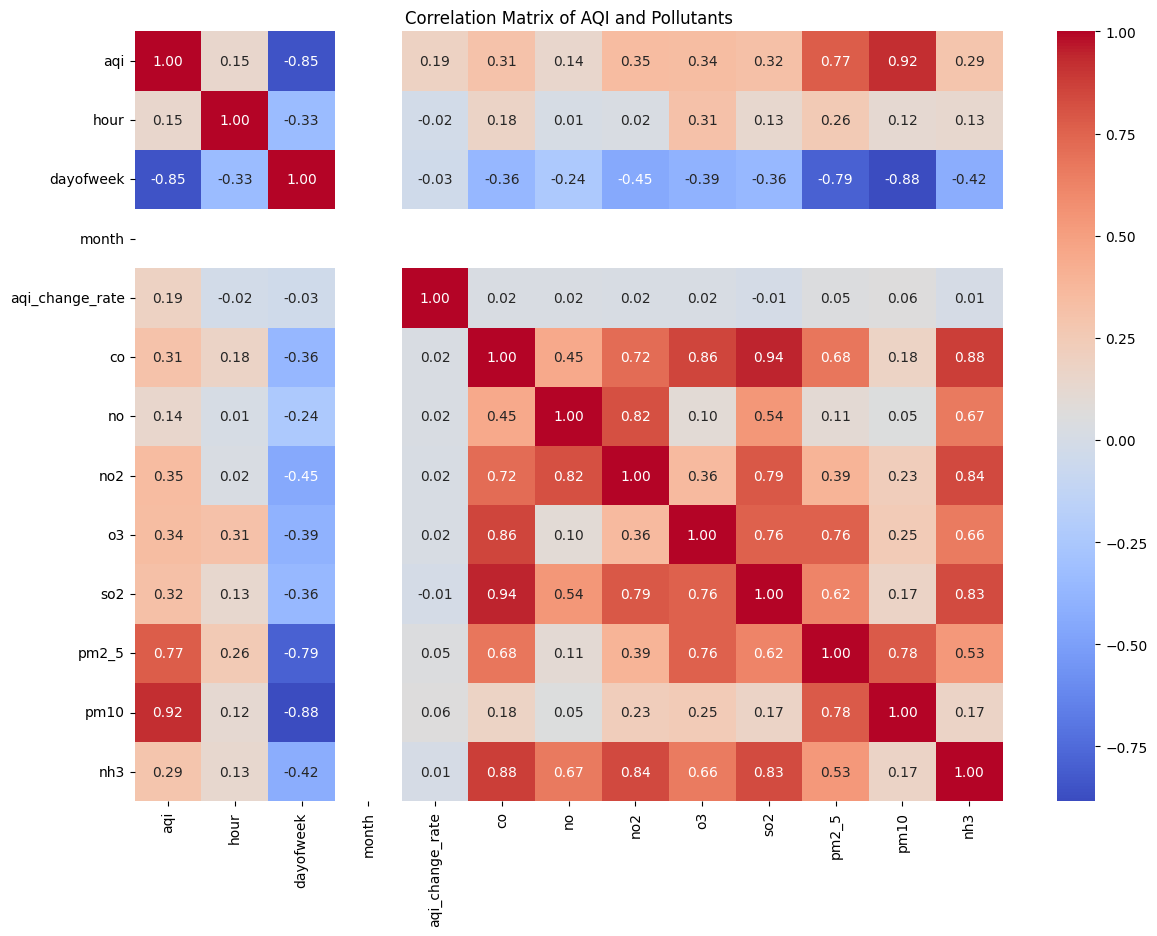

In [4]:
# Cell 3 (Corrected)
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of AQI and Pollutants')
plt.show()

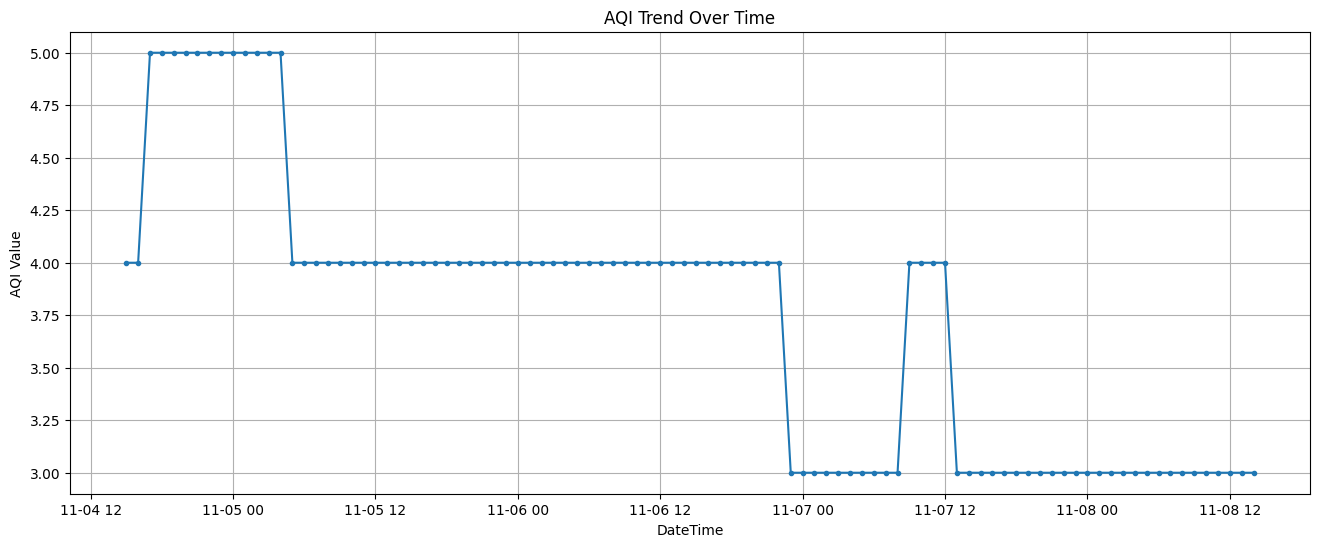

In [5]:
# Cell 4
# Plotting the AQI trend over time
plt.figure(figsize=(16, 6)) # Set the size of the chart
plt.plot(df['datetime'], df['aqi'], marker='.', linestyle='-') # Plot datetime vs AQI
plt.title('AQI Trend Over Time') # Add a title to the chart
plt.xlabel('DateTime') # Label for the x-axis
plt.ylabel('AQI Value') # Label for the y-axis
plt.grid(True) # Add a grid for better readability
plt.show() # Display the chart